In [2]:
# Python Notebook for PHYS 422 Assignment #2

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from matplotlib import rc
import scipy as sp

# extra stuff to make the plots look nice:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["cmr10"],
          "font.size": 20
         }
plt.rcParams.update(params)
plt.rcParams['axes.formatter.use_mathtext'] = True

import os
os.environ["PATH"]
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Set tick parameters using rcParams
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['xtick.minor.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.rcParams['ytick.minor.width'] = 0.7

plt.rcParams['font.weight'] = 'bold'

from matplotlib.colors import PowerNorm


#### 4) COMPUTATION: Three magnetic dipoles are arranged such that they are at the mid-points of the sides of an equilateral triangle that lies in x - y plane, as shown below. 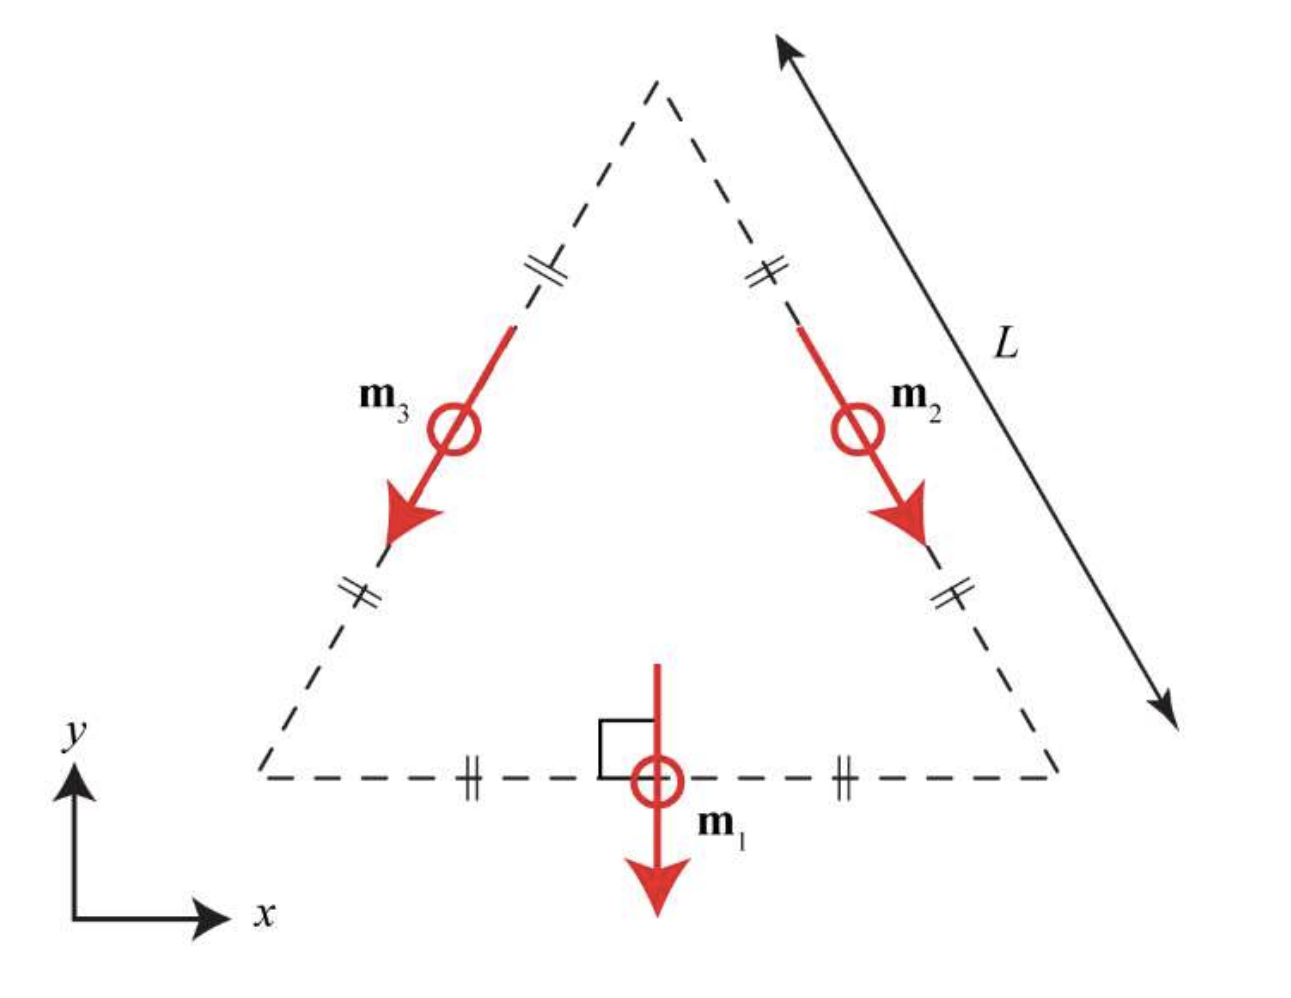

Dipole $\textbf{m}_1$ points in the$-\hat{\textbf{y}}$ direction, and dipoles $\textbf{m}_2$ and $\textbf{m}_3$ are aligned to the sides of triangle and are
directed downwards as shown in the diagram. The sides of the triangle have a length L = 2 cm, and all the
dipoles have same magnitude of dipole moment, $|\textbf{m}|=0.2 A\cdot{m^2}$
. 

Your task is to determine the force on the
lower magnetic dipole, labelled $\textbf{m}_1$ in the diagram, by producing computer code that employs the Maxwell
stress tensor, to determine the force on the lower dipole. 

Once you have computed this force, comment on
your answer. Does it fit with any potential ‘intuition’ you have of regarding the sign and magnitude of the
force? 

What other methods could use to confirm your results or get insights into what is happening here? 

For
example, would any specific plots be useful to investigate what is happening here? 

---
### Solution:

To actually code the problem we need to set up the fields and Maxwell's Stress tensor correctly. The field from a dipole is given by (Via the notes):

$$
\vec{B}_{dip} = \frac{\mu_0}{4 \pi} \frac{3\hat{r}(\vec{m}\cdot \hat{r})-\vec{m}}{r^3}
$$

But of course $\hat{r} = \frac{\vec{r}}{|r|}$:

$$
\vec{B}_{dip} = \frac{\mu_0}{4 \pi} \frac{3\vec{r}(\vec{m}\cdot \vec{r})-\vec{m}r^2}{r^5}
$$

We now have expressions for the general fields from a dipole but need specific ones due to the geometry of the problem. Position vectors defined by:

$$
\vec{\mathfrak{r}} = \vec{r} - \vec{r}'
$$

If we place dipole 1 at the origin of our coordinate system:

$$
\vec{\mathfrak{r}}_1 = (x,y,z)
$$

The x components of the other two dipoles will simply be half of half of the length of a side of the triangle as it is an equilaterial triangle. As for the y components, we may consider the right triangle that has right angle at the center of the triangle and connects dipole 1 with 2 or 3. Thus:

$$
c^2 = a^2 +b^2 = (0.5L)^2 + (0.25L)^2 \longrightarrow c = \frac{\sqrt{3}}{2} L
$$

Thus:

$$
\vec{\mathfrak{r}}_2 = (x-\frac{1}{4}L,y-\frac{\sqrt{3}}{2}L,z)
$$

$$
\vec{\mathfrak{r}}_3 = (x+\frac{1}{4}L,y-\frac{\sqrt{3}}{2}L,z)
$$

We now need the dipole moment vector. The first is straight down and easy. We may decompose the components of the dipole moment vectors into the x, y parts which gives the following. The angle the moment makes with vertical will be $60 ^{\circ}$ as the triangle is equilateral.


$$
\vec{m}_1 = (0,-m,0) \ where \ m=|m|
$$

$$
\vec{m}_2 = (\frac{1}{2}m,-\frac{\sqrt{3}}{2}m,0) 
$$

$$
\vec{m}_3 = (-\frac{1}{2}m,-\frac{\sqrt{3}}{2}m,0) 
$$

Finally, we can take a look at the stress tensor to determine what terms are necessary in our computation. We can say that $\vec{E}=0$ and so only the magnetic field contributes. Thus, the second component of the force calculation involving the Poynting vector will vanish. Thus, force on dipole 1 will be:

$$
\vec{F} = \oint_S \stackrel{\leftrightarrow}{T}.d\vec{a}
$$

We may choose our surface that we integrate over carefully to eliminate many of the terms. Allowing one side to be along $y=1/2$ with all other sides of a cube going to infinity, we enclose the dipole of interest. Our area element then simply becomes:

$$
d\vec{a} = dxdz\hat{y}
$$

This effectively eliminates all terms that are not in the middle column of the stress tensor, leaving us with only 3 terms.

$$
\stackrel{\leftrightarrow}{T}.d\vec{a} = (T_{xy} dxdz, T_{yy}dxdz, T_{zy}dxdz)
$$

Our bounds of integration then become $x,z\in (-\infty,\infty)$. We need to write the form for $T_ij$:

$$
T_{ij} = \frac{1}{\mu_0} (B_iB_j -\frac{1}{2} \delta_{ij} B^2)
$$

Our programming task then becomes:

1) Calculate the component-wise total field due to the dipole configuration.
2) Calculate the 3 components of the tensor using the above field definition.
3) Integrate each component over our bounds in each coordinate.
4) Get the force acting on the first dipole.
5) Profit.

In [3]:
# we can begin by defining all of the requisite constansts:

# Side length:
L = 0.02 # m

# Dipole magnitude:
m = 0.2 #Am^2

# free space:
eps = 8.854187817* 10**(-12) # F/m
mu = 4*np.pi * 10**(-7) # H/m

In [9]:
# It will be useful to define a general dipole field using the first
# definition above:

def dipole_field(x, y, z, mx, my, mz):
    '''
    Takes three position components
    and three dipole components, calculates 
    the field due to a dipole with position 
    and moment due to the input, and returns
    the field components (1x3 numpy array)
    '''
    
    r_vec = np.array([x,y,z])
    m_vec = np.array([mx,my,mz])
    
    constant = mu /(4*np.pi)
    
    # magnitude of r:
    r_mag = np.sqrt(r_vec[0]**2 + r_vec[1]**2 + r_vec[2]**2)
    
    B_field = constant* (1/r_mag**5) *(3*r_vec*(np.dot(m_vec,r_vec)) - m_vec*(r_mag**2))
    
    return B_field



In [10]:
# it will be useful to define vectors corresponding to r':

r_1 = np.array([0,0,0])
r_2 = np.array([-L/4, -np.sqrt(3)/2 * L, 0])
r_3 = np.array([L/4, -np.sqrt(3)/2 * L, 0])

# and m vector:

m_1 = np.array([0,-m,0])
m_2 = np.array([m/2, -np.sqrt(3)/2* m, 0])
m_3 = np.array([-m/2, -np.sqrt(3)/2* m, 0])

# Now we may define a function that is specific to our geometry:

def field_from_dipoles(x, y, z,r1=r_1, r2=r_2, r3=r_3, m1=m_1, m2=m_2, m3=m_3):
    '''
    Takes coordinates x,y,z, prime position vectors
    and magnetization vectors for each dipole
    calculates the magnetic field using our dipole field
    from before and returns the total field from
    all three dipoles
    '''
    
    B_1_field = dipole_field(x-r1[0],y-r1[1],z-r1[2],m1[0], m1[1], m1[0])
    B_2_field = dipole_field(x-r2[0],y-r2[1],z-r2[2],m2[0], m2[1], m2[0])
    B_3_field = dipole_field(x-r3[0],y-r3[1],z-r3[2],m3[0], m3[1], m3[0])
    
    B_total = (B_1_field + B_2_field + B_3_field)
    
    return B_total

In [12]:
# using our function we just defined, we may find the tensor elements:

def tensor_elem_ij(x,z,y, i=0,j=1):
    '''
    Takes coordinates x,y,z (all other variables 
    default in previous functions, to be truly general 
    would need to add that here) as well as indexes
    i and j and calculates the tensor 
    element ij and returns it. i,j must be one of
        0,1,2
    '''
    
    if i !=j:
        i_component = field_from_dipoles(x,y,z)[i]
        j_component = field_from_dipoles(x,y,z)[j]
        tensor_ij = i_component * j_component / mu
    
    elif i == j:
        ij_component = field_from_dipoles(x,y,z)[i]
        ij_norm = np.sqrt(field_from_dipoles(x,y,z)[0]**2 +
                          field_from_dipoles(x,y,z)[1]**2 +
                          field_from_dipoles(x,y,z)[2]**2)
        tensor_ij = 1/(mu)*(ij_component**2 - (1/2) *(ij_norm**2))
    
    return tensor_ij
    

In [ ]:
# we now have all of the components we need to calculate the forces:

# will use an integrator from scipy:

from scipy.integrate import dblquad 

# choose a sufficiently large value for bounds to give
# illusion of infinity:

lb, ub = -100,100 # << x,y,z

#surface coordinate:
yy = 0.5*L

# force components:
F_x = dblquad(tensor_elem_ij, lb,ub,lb,ub, args=(yy,0,1))
F_y = dblquad(tensor_elem_ij, lb,ub,lb,ub, args=(yy,1,1))
F_z = dblquad(tensor_elem_ij, lb,ub,lb,ub, args=(yy,2,1))


# we can run it for a bunch of bounds to see what happens:

bounds = np.linspace(0.01, 10000, 100)

#F_y_db = np.array([dblquad(tensor_elem_ij, -bounds[b],bounds[b],-bounds[b],bounds[b], args=(yy,1,1)) for b in range(len(bounds))]).T



In [42]:
print(f"X component of force is: {F_x[0]} ~ 0")
print(f"Y component of force is: {F_y[0]}")
print(f"Z component of force is: {F_z[0]} ~ 0")

X component of force is: -5.288656585982776e-35 ~ 0
Y component of force is: 3.894689213631741e-07
Z component of force is: 3.0233785651009605e-32 ~ 0


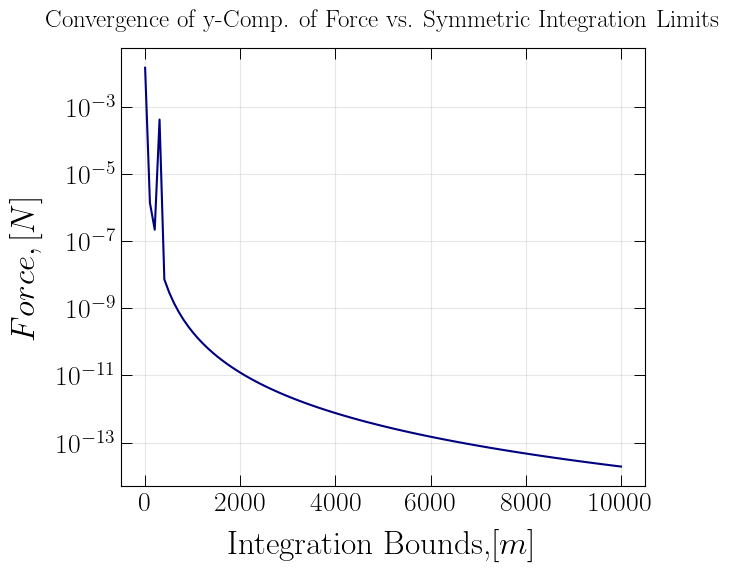

In [52]:
# plot of force convergence as a function of the integration bounds (in metres)


# initiates plotting parameters
width=8;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Convergence of y-Comp. of Force vs. Symmetric Integration Limits", pad = 15, fontsize=18)
ax1.set_ylabel(r"$Force, [N]$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"Integration Bounds,$ [m]$",labelpad =10,fontsize=24)

# actual plots:
ax1.semilogy(bounds,F_y_db[0], 'navy')

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(20));ax1.yaxis.set_minor_locator(MultipleLocator(4))
#ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(200))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.grid(True)
plt.show()

As the x and z components of force are roughly 0, we may then say that:

$$
\vec{F} = (0, ~3.9\cdot10^{-7} N, 0)
$$

For integration bounds of $(-100,100)$.

This means that the force on dipole one is pointing directly upwards. This is to be expected as there are no components of dipole moment (field) in the z direction and the forces acting on the dipole from the other two should cancel out due to symmetry in the x direction. To see the way this works geometrically, we could plot the field in the configuration as a vector plot as well as with the magnitude to see that the field cancels along x. A result we have previously is that the force on a dipole is given by:

$$
\vec{F} = \nabla (\vec{m}\cdot \vec{B})
$$
Which in this configuration, the dot product will have components that increase along the positive y-direction such that we would expect the force to be upwards.

Note: The method of integration used here is not strictly convergent. This could be do to the naive Riemann sum approach used by dblquad or by the field itself. With very large integration bounds we could put a better bound of the force but it may approach 0 as we increase the limits. 

It seems like at large enough limits we get somewhat of an approach to $\approx 10^{-14}N$. This seems extremely small.